# Artifical Neural Network

Dataset is of a private bank, We need to predicte weather the customer will leave/excit the bank in future or not.

## Import Liberies

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras import layers

In [ ]:
data = pd.read_csv('Churn_Modelling.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
data = pd.get_dummies(data,columns=['Geography','Gender'])
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
0,1,15634602,Hargrave,619,42,2,0.00,1,1,1,101348.88,1,1,0,0,1,0
1,2,15647311,Hill,608,41,1,83807.86,1,0,1,112542.58,0,0,0,1,1,0
2,3,15619304,Onio,502,42,8,159660.80,3,1,0,113931.57,1,1,0,0,1,0
3,4,15701354,Boni,699,39,1,0.00,2,0,0,93826.63,0,1,0,0,1,0
4,5,15737888,Mitchell,850,43,2,125510.82,1,1,1,79084.10,0,0,0,1,1,0


In [ ]:
data.drop(['RowNumber','CustomerId','Surname'],axis=1,inplace=True)

In [ ]:
X = data.drop('Exited',axis=1)
y = data['Exited']

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train, y_test = train_test_split(X , y, test_size=0.20, random_state=47)

In [ ]:
X_train

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
1402,757,29,8,130306.49,1,1,0,77469.38,1,0,0,0,1
954,665,42,2,156371.61,2,0,1,156774.94,0,0,1,1,0
6196,698,29,5,95167.55,1,1,1,152723.23,1,0,0,0,1
6331,629,35,8,112330.83,1,1,1,91001.02,0,1,0,0,1
7124,596,34,4,99441.21,2,0,1,4802.27,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2896,782,33,2,94493.03,1,0,1,101866.39,1,0,0,1,0
8883,471,28,5,0.00,2,1,1,22356.97,0,0,1,1,0
6728,804,33,10,138335.96,1,1,1,80483.76,0,1,0,1,0
1926,693,31,1,0.00,2,0,1,182270.88,1,0,0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler
obj = StandardScaler()
X_train = obj.fit_transform(X_train)
X_test = obj.fit_transform(X_test)

In [ ]:
X_train.shape

(8000, 13)

In [ ]:
model = Sequential([
    layers.Dense(units=10, kernel_initializer='HeNormal', activation='relu', input_dim=13),
    layers.Dropout(0.3),
    layers.Dense(units=20, kernel_initializer='HeNormal', activation='relu'),
    layers.Dropout(0.2),
    layers.Dense(units=15, kernel_initializer='HeNormal', activation='relu'),
    layers.Dropout(0.1),
    layers.Dense(units=1, kernel_initializer='glorot_uniform', activation='sigmoid'),
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 10)                140       
                                                                 
 dropout (Dropout)           (None, 10)                0         
                                                                 
 dense_8 (Dense)             (None, 20)                220       
                                                                 
 dropout_1 (Dropout)         (None, 20)                0         
                                                                 
 dense_9 (Dense)             (None, 15)                315       
                                                                 
 dropout_2 (Dropout)         (None, 15)                0         
                                                                 
 dense_10 (Dense)            (None, 1)                

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model_history = model.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=100)

Epoch 1/100
536/536 [==============================] - 2s 2ms/step - loss: 0.5685 - accuracy: 0.7729 - val_loss: 0.4748 - val_accuracy: 0.7986
Epoch 2/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4918 - accuracy: 0.8007 - val_loss: 0.4491 - val_accuracy: 0.8023
Epoch 3/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4749 - accuracy: 0.8039 - val_loss: 0.4360 - val_accuracy: 0.8020
Epoch 4/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4524 - accuracy: 0.8084 - val_loss: 0.4216 - val_accuracy: 0.8179
Epoch 5/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4472 - accuracy: 0.8125 - val_loss: 0.4208 - val_accuracy: 0.8092
Epoch 6/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4343 - accuracy: 0.8095 - val_loss: 0.4115 - val_accuracy: 0.8103
Epoch 7/100
536/536 [==============================] - 1s 2ms/step - loss: 0.4302 - accuracy: 0.8128 - val_loss: 0.4001 - val_accuracy: 0.8277

Epoch 58/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3582 - accuracy: 0.8554 - val_loss: 0.3664 - val_accuracy: 0.8368
Epoch 59/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3522 - accuracy: 0.8541 - val_loss: 0.3622 - val_accuracy: 0.8425
Epoch 60/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3528 - accuracy: 0.8578 - val_loss: 0.3670 - val_accuracy: 0.8402
Epoch 61/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3549 - accuracy: 0.8563 - val_loss: 0.3654 - val_accuracy: 0.8398
Epoch 62/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3573 - accuracy: 0.8543 - val_loss: 0.3652 - val_accuracy: 0.8395
Epoch 63/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3558 - accuracy: 0.8576 - val_loss: 0.3628 - val_accuracy: 0.8436
Epoch 64/100
536/536 [==============================] - 1s 2ms/step - loss: 0.3514 - accuracy: 0.8582 - val_loss: 0.3615 - val_accuracy:

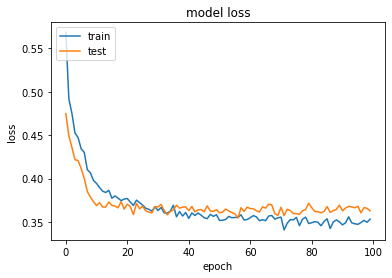

In [ ]:
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
y_predict = model.predict(X_test)

In [ ]:
y_predict

array([[0.07512715],
       [0.05564809],
       [0.35724753],
       ...,
       [0.08555564],
       [0.08613208],
       [0.11624262]], dtype=float32)

In [ ]:
y_predict = (y_predict > 0.5)

In [ ]:
y_predict

array([[False],
       [False],
       [False],
       ...,
       [False],
       [False],
       [False]])

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix
print(accuracy_score(y_predict,y_test))
print('\n',confusion_matrix(y_predict,y_test))

0.836

 [[1564  315]
 [  13  108]]
